In [79]:
import tensorflow as tf

print(tf.__version__)

import matplotlib.pyplot as plt
import numpy as np

2.2.0


In [80]:
import tensorflow.keras as keras

AlexNet = keras.models.load_model('Trained_Models/alexnet.h5')
VGG = keras.models.load_model('Trained_Models/VGG.h5')
googLeNet = keras.models.load_model('Trained_Models/googLeNet_20200604.h5')
ResNet = keras.models.load_model('Trained_Models/scott_resnet.h5')

In [81]:
Inputs = keras.Input(shape=(64,64,3))

y0 = AlexNet(Inputs)
y1 = VGG(Inputs)
y2 = googLeNet(Inputs)
y3 = ResNet(Inputs)
output = keras.layers.average([y0, y1, y2, y3])
ensemble_model = keras.Model(inputs=Inputs, outputs=output)

from tensorflow.keras.preprocessing.image import array_to_img

country_index = ['can', 'eng','fra','ger','ita','kor','usa']

ValueError: The name "model" is used 2 times in the model. All layer names should be unique.

In [82]:
test_dir = 'Flag_Data/test'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
imageGenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
    validation_split=.1
)

testGenerator = ImageDataGenerator(
    rescale=1./255
)

testGen = imageGenerator.flow_from_directory(
    test_dir,
    target_size=(64, 64),
)

# loss and accuracy
ensemble_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Found 199 images belonging to 7 classes.


In [85]:
ensemble_model.evaluate(testGen, steps=199)

199/199 [==============================] - 29s 145ms/step - loss: 0.2528 - accuracy: 0.9341

[0.2527957260608673, 0.9340776205062866]

예측: kor
정답: kor


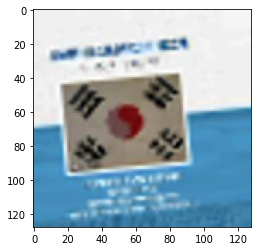

In [99]:
from tensorflow.keras.preprocessing.image import array_to_img

country_index = ['can', 'eng','fra','ger','ita','kor','usa']
imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = ensemble_model.predict(arr.reshape(1, 64, 64, 3))
result = np.argmax(result[0])
print('예측: {}'.format(country_index[result]))
print('정답: {}'.format(country_index[np.argmax(imgs[1][0])]))\



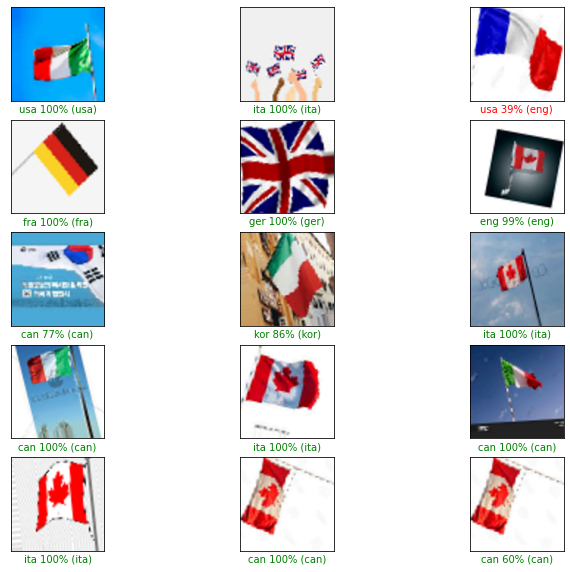

In [103]:
# Visualization
def plot_image(i, prediction, predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    if prediction == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(prediction,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    imgs = testGen.next()
    arr = imgs[0][0]
    img = array_to_img(arr).resize((128, 128))
    plt.imshow(img)
    result = ensemble_model.predict(arr.reshape(1, 64, 64, 3))
    prediction = country_index[np.argmax(result[0])]
    answer = country_index[np.argmax(imgs[1][0])]

    predictions_array = result[0]
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, prediction, predictions_array, answer, img)